# Deploy a trained model on the test set

In [5]:
# Put path to model here
model_path = 'outputs/2024-03-11_015721/best/best_model.pth'


HYPERPARAMETERS FOR SELECTED MODEL
Epoch: 3/50
Hidden Size: 200
Learning Rate: 0.001
Batch Size: 64
Sequence Length: 24

Training Loss: 0.06615091860294342
Validation Loss: 0.00511624151840806
Root Mean Squared Error (RMSE): 0.52380774977008
Mean Absolute Error (MAE): 0.47
Mean Absolute Percentage Error (MAPE): 8.96%


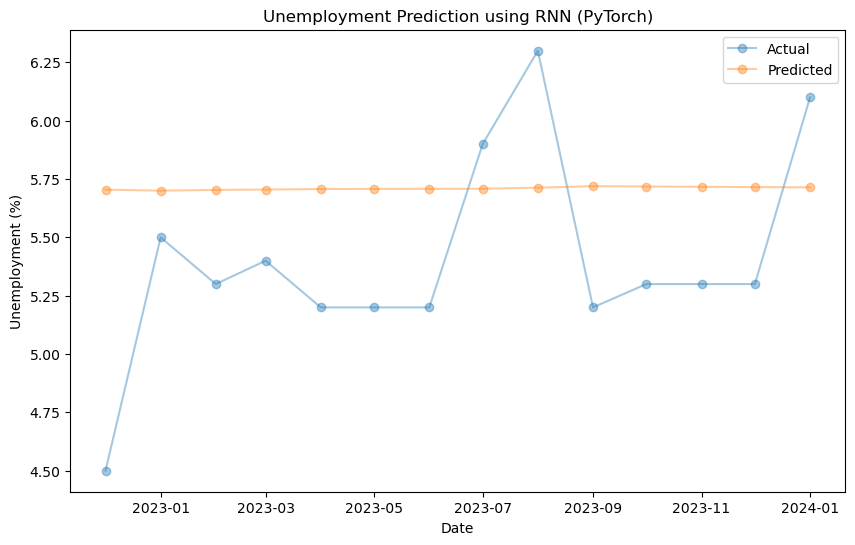

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from run_rnn import *

# Evaluate on the test set
model_path =  torch.load(model_path)
seq_length= model_path['seq_length']

data_cleaned, data_unscaled, scaler = get_preprocessed_data()
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data=data_cleaned,seq_length=seq_length)

# Load best model
model = RNNModel(input_size=1, hidden_size=model_path['hidden_size'], output_size=1)
model.load_state_dict(model_path['model_state_dict'])

# Evaluate model on the test data
model.eval() 
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_pred_test = model(X_test_tensor).numpy()
    y_pred_test = scaler.inverse_transform(y_pred_test)
    y_test = scaler.inverse_transform(y_test)

# Print hyperparameters of the selected model to console
print("\n==================================")
print("HYPERPARAMETERS FOR SELECTED MODEL")
print("Epoch:", f"{model_path['epoch']}/{model_path['total_epochs']}")
print("Hidden Size:", model_path['hidden_size'])
print("Learning Rate:", model_path['learning_rate'])
print("Batch Size:", model_path['batch_size'])
print("Sequence Length:", model_path['seq_length'])
print("\n==================================")
print("Training Loss:", model_path['train_loss'])
print("Validation Loss:", model_path['val_loss'])
# Calculate RMSE and print to console
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Visualize predictions on test set using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(data_unscaled.index[X_train.shape[0]+X_val.shape[0]+seq_length:], y_test, label='Actual',alpha=0.4, marker='o')
plt.plot(data_unscaled.index[X_train.shape[0]+X_val.shape[0]+seq_length:], y_pred_test, label='Predicted',alpha=0.4, marker='o')
plt.xlabel('Date')
plt.ylabel('Unemployment (%)')
plt.title('Unemployment Prediction using RNN (PyTorch)')
plt.legend()
plt.show()
